<a href="https://colab.research.google.com/github/shaon11579/VAE-2021-/blob/main/R_in_google_colab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
install.packages("tfprobability")
library(tfprobability)
library(tensorflow)
library(tfprobability)
library(keras)
install.packages("ML2Pvae")
library(ML2Pvae)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘config’, ‘tfruns’, ‘tfautograph’, ‘png’, ‘zeallot’, ‘tensorflow’, ‘reticulate’, ‘keras’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
qqm <- read.csv("/usr/local/lib/R/site-library/Qmat2.csv")
data <- read.csv("/usr/local/lib/R/site-library/Qmat2_subset.csv")

In [8]:
# Load data
data <- as.matrix(data)
Q <- as.matrix(qqm)

In [9]:
head(data)

MA_0011,MA_0012,MA_0014,MA_0015,MA_0016,MA_0018,MA_0020,MA_0022,MA_0024,MA_0025,⋯,MA_0064,MA_0065,MA_0066,MA_0067,MA_0068,MA_0069,MA_0070,MA_0071,MA_0072,MA_0073
0,0,1,0,0,1,0,0,0,1,⋯,0,0,0,0,0,0,0,1,0,0
1,1,1,1,1,1,1,1,1,1,⋯,1,0,1,1,1,1,1,1,1,1
0,1,1,0,1,0,0,0,0,1,⋯,1,0,0,0,0,1,0,0,1,0
1,0,0,0,1,0,1,0,0,0,⋯,0,1,1,0,0,0,1,0,1,1
1,1,0,0,0,0,0,1,1,1,⋯,1,1,1,1,1,0,0,0,0,1
1,1,1,0,1,1,0,0,1,1,⋯,1,0,1,1,0,1,1,1,1,1


In [10]:
head(Q)

MA_0011,MA_0012,MA_0014,MA_0015,MA_0016,MA_0018,MA_0020,MA_0022,MA_0024,MA_0025,⋯,MA_0064,MA_0065,MA_0066,MA_0067,MA_0068,MA_0069,MA_0070,MA_0071,MA_0072,MA_0073
0,0,0,0,1,0,1,1,0,0,⋯,0,1,1,0,0,1,0,0,0,1
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,1,0,0,0
1,1,1,1,0,1,0,0,1,0,⋯,1,0,0,0,1,0,0,1,1,0
0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,1,0,0
1,0,1,1,1,1,1,1,1,1,⋯,1,1,1,1,0,1,1,0,1,1


In [44]:
str(data)

 int [1:4199, 1:32] 0 1 0 1 1 1 1 0 1 1 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:32] "MA_0011" "MA_0012" "MA_0014" "MA_0015" ...


In [45]:
str(Q)

 int [1:32, 1:32] 0 0 1 0 0 1 0 1 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:32] "MA_0011" "MA_0012" "MA_0014" "MA_0015" ...


In [46]:
summary(data)

    MA_0011          MA_0012          MA_0014         MA_0015      
 Min.   :0.0000   Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median :1.000   Median :1.0000  
 Mean   :0.8338   Mean   :0.6602   Mean   :0.708   Mean   :0.5568  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.000   Max.   :1.0000  
    MA_0016          MA_0018          MA_0020          MA_0022      
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median :0.0000   Median :1.0000  
 Mean   :0.5344   Mean   :0.6411   Mean   :0.2336   Mean   :0.7061  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
    MA_0024          MA_0025          MA_

In [47]:
summary(Q)

    MA_0011          MA_0012          MA_0014          MA_0015      
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.3438   Mean   :0.3125   Mean   :0.3438   Mean   :0.3125  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
    MA_0016          MA_0018          MA_0020          MA_0022      
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.2812   Mean   :0.3438   Mean   :0.2812   Mean   :0.2812  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
    MA_0024          MA_0025      

In [48]:
tail(data)

,MA_0011,MA_0012,MA_0014,MA_0015,MA_0016,MA_0018,MA_0020,MA_0022,MA_0024,MA_0025,⋯,MA_0064,MA_0065,MA_0066,MA_0067,MA_0068,MA_0069,MA_0070,MA_0071,MA_0072,MA_0073
"[4194,]",1,0,1,1,0,1,1,1,0,0,⋯,1,0,0,0,1,0,0,0,1,0
"[4195,]",1,1,1,0,1,1,0,1,1,1,⋯,1,1,1,1,1,1,1,0,1,1
"[4196,]",1,1,1,1,1,1,1,1,1,1,⋯,1,0,1,1,1,1,1,1,1,1
"[4197,]",1,0,1,1,1,1,0,1,0,0,⋯,0,0,1,0,0,0,0,0,0,0
"[4198,]",0,1,1,1,1,1,1,1,1,0,⋯,1,1,1,1,1,0,1,1,1,1
"[4199,]",1,1,1,0,1,1,0,1,1,0,⋯,1,1,1,0,0,0,1,1,1,1


In [12]:
tail(Q)

,MA_0011,MA_0012,MA_0014,MA_0015,MA_0016,MA_0018,MA_0020,MA_0022,MA_0024,MA_0025,⋯,MA_0064,MA_0065,MA_0066,MA_0067,MA_0068,MA_0069,MA_0070,MA_0071,MA_0072,MA_0073
"[27,]",0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
"[28,]",0,0,0,1,0,0,0,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
"[29,]",1,1,1,0,1,1,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
"[30,]",1,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,1
"[31,]",0,1,1,1,1,1,0,1,0,1,⋯,0,1,1,0,1,1,1,0,1,1
"[32,]",1,0,0,0,0,0,1,0,1,0,⋯,1,0,0,1,0,0,0,1,0,0


In [11]:
# Model parameters
num_items <- as.double(dim(Q)[2])
num_skills <- as.double(dim(Q)[1])
num_students <- dim(data)[1]
means <- rep(0,num_skills)
enc_arch <- c(16L, 8L)
enc_act <- c('relu', 'tanh')
out_act <- 'sigmoid'
kl <- 1

In [12]:
#Model 1: An ML2P-VAE model assuming latent traits are independent

models_ind <- build_vae_independent(num_items, num_skills,
                                    Q,
                                    model_type = 2,
                                    enc_hid_arch = enc_arch,
                                    hid_enc_activation = enc_act,
                                    output_activation = out_act)
encoder_ind <- models_ind[[1]]
decoder_ind <- models_ind[[2]]
vae_ind <- models_ind[[3]]
encoder_ind
decoder_ind
vae_ind

Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 32)]      0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 16)        528      input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 8)         136      hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 32)        288      hidden_2[0][0]             
________________________________________________________________________________
z_log_var (Dense)         (None, 32)        288      hidden_2[0][0]             
________________________________________________________________________________
z (Conc

Model
Model: "model_1"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 32)]                    0           
________________________________________________________________________________
vae_out (Dense)                     (None, 32)                      1056        
Total params: 1,056
Trainable params: 1,056
Non-trainable params: 0
________________________________________________________________________________



Model
Model: "model_2"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 32)]                    0           
________________________________________________________________________________
model (Functional)                  [(None, 32), (None, 32), (None, 1240        
________________________________________________________________________________
model_1 (Functional)                (None, 32)                      1056        
Total params: 2,296
Trainable params: 2,296
Non-trainable params: 0
________________________________________________________________________________



In [13]:
# Model 2: An ML2P-VAE model assuming correlation among traits is known
cov <- as.matrix(correlation_matrix) 
models_cor <- build_vae_correlated(num_items,
                                    num_skills,
                                              Q,
                                               model_type = 2,
                                               mean_vector = means,
                                               covariance_matrix = cov,
                                               enc_hid_arch = enc_arch,
                                               hid_enc_activations = enc_act,
                                               output_activation = out_act,
                                               kl_weight = kl)
encoder_cor <- models_cor[[1]]
decoder_cor <- models_cor[[2]]
vae_cor <- models_cor[[3]]
encoder_cor

ERROR: ignored

In [14]:
# Training parameters
num_train <- floor(0.8 * num_students)
num_test <- num_students - num_train
data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
num_epochs <- 30
batch_size <- 16

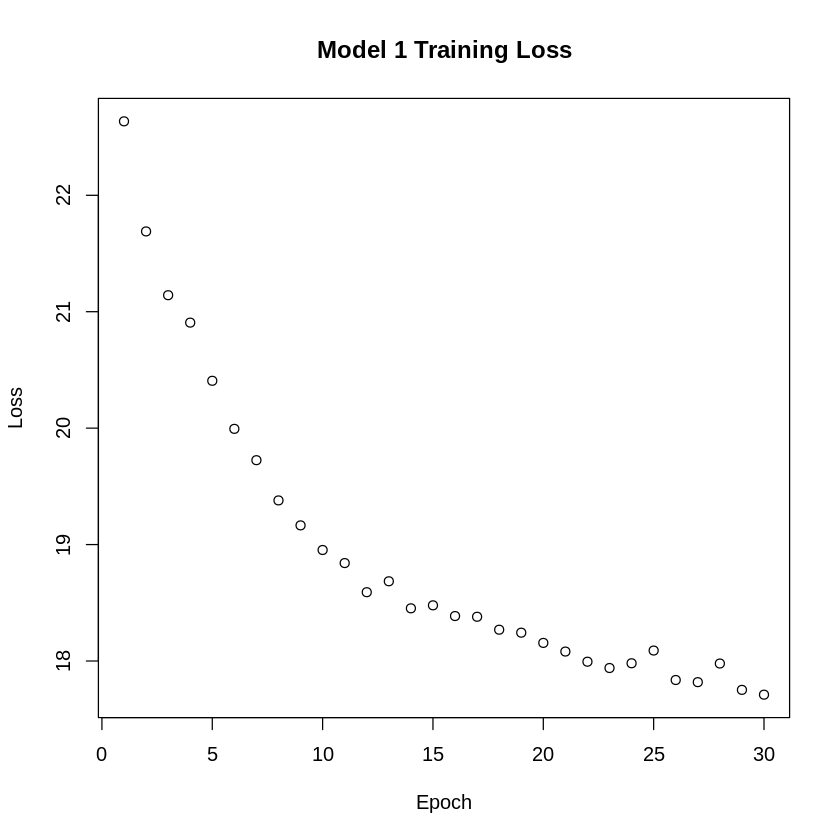

In [15]:
# Train Model 1
history_ind <- train_model(vae_ind, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

plot(history_ind,
     main = 'Model 1 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')

In [16]:
# Get parameter estimates for Model 1
item_param_estimates_ind<- get_item_parameter_estimates(decoder_ind, model_type = 2)
diff_est_ind <- item_param_estimates_ind[[1]]
disc_est_ind <- item_param_estimates_ind[[2]]
test_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data_test)[[1]]
all_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data)[[1]]

In [17]:
# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true)
diff_true <- as.matrix(diff_true) 
theta_true<- as.matrix(theta_true)

In [18]:
# Examine Model 1 estimates
par(pty="s") 
matplot(t(disc_true),t(disc_est_ind), pch = '*',
        xlim = c(0.05, 2), ylim = c(0.05, 2),
        main = 'Model 1 Discrimination Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')


ERROR: ignored

In [19]:
# Discrimination Parameters

par(pty="s")
plot(diff_true, diff_est_ind, pch = '*',
     xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
     main = 'Model 1 Difficulty Parameters',
     sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

ERROR: ignored

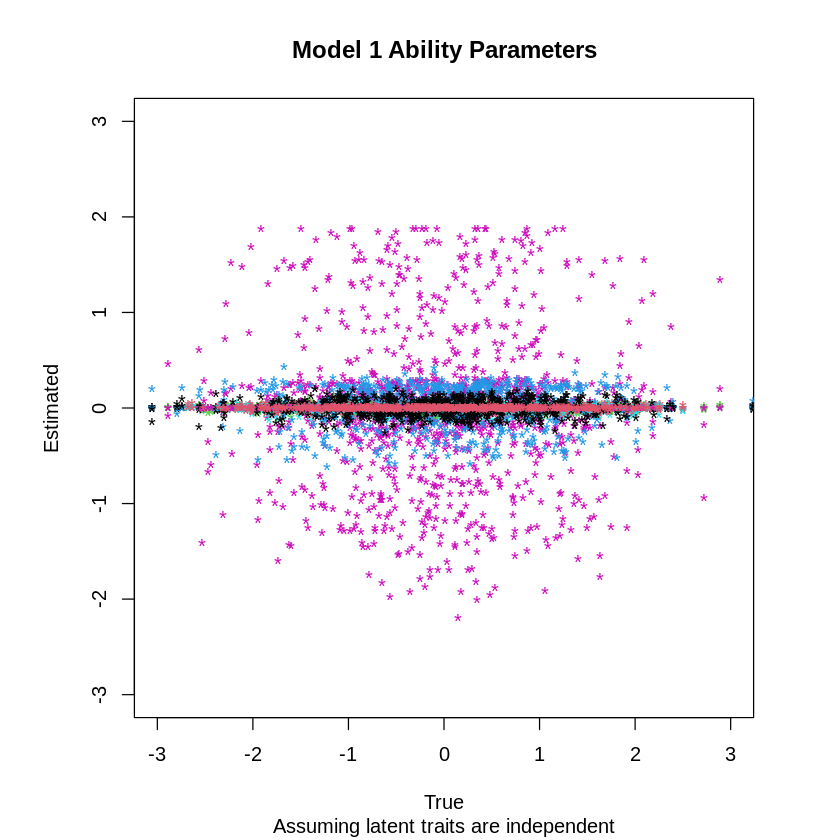

In [20]:
# Ability Parameters
par(pty="s")
matplot(theta_true[3200:3800,],
        all_theta_est_ind[3200:3800,], pch = '*',
        xlim = c(-3,3), ylim = c(-3,3),
        main = 'Model 1 Ability Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

In [21]:
# Need to load in covariance matrix for this model type
cov <- as.matrix(correlation_matrix)
models_cor <- build_vae_correlated(num_items,
                                           num_skills,
                                           Q,
                                           model_type = 2,
                                           mean_vector = means,
                                           covariance_matrix = cov,
                                           enc_hid_arch = enc_arch,
                                           hid_enc_activations = enc_act,
                                           output_activation = out_act,
                                           kl_weight = kl)
encoder_cor <- models_cor[[1]]
decoder_cor <- models_cor[[2]]
vae_cor <- models_cor[[3]]
encoder_cor

ERROR: ignored

In [22]:
decoder_cor

ERROR: ignored

In [23]:
# For single dimensional IRT, connect all items to the one skill
q_ones <- matrix(rep(1, num_items), nrow = 1, ncol = num_items)
 models_1pl <- build_vae_independent(num_items,
                                        num_skills = 1,
                                        Q = q_ones,
                                        model_type = 1,
                                        enc_hid_arch = enc_arch,
                                        hid_enc_activation = enc_act,
                                        output_activation = out_act)
                                        encoder_1pl <- models_1pl[[1]]
decoder_1pl <- models_1pl[[2]]
vae_1pl <- models_1pl[[3]]
encoder_1pl


Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model_3"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 32)]      0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 16)        528      input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 8)         136      hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 1)         9        hidden_2[0][0]             
________________________________________________________________________________
z_log_var (Dense)         (None, 1)         9        hidden_2[0][0]             
________________________________________________________________________________
z (Co

In [24]:
decoder_1pl

Model
Model: "model_4"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 1)]                     0           
________________________________________________________________________________
vae_out (Dense)                     (None, 32)                      64          
Total params: 64
Trainable params: 64
Non-trainable params: 0
________________________________________________________________________________



In [25]:
vae_1pl

Model
Model: "model_5"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 32)]                    0           
________________________________________________________________________________
model_3 (Functional)                [(None, 1), (None, 1), (None, 1 682         
________________________________________________________________________________
model_4 (Functional)                (None, 32)                      64          
Total params: 746
Trainable params: 746
Non-trainable params: 0
________________________________________________________________________________



In [26]:
# Training parameters
num_train <- floor(0.8 * num_students)
 num_test <- num_students - num_train 
 data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
 num_epochs <- 30
batch_size <- 16

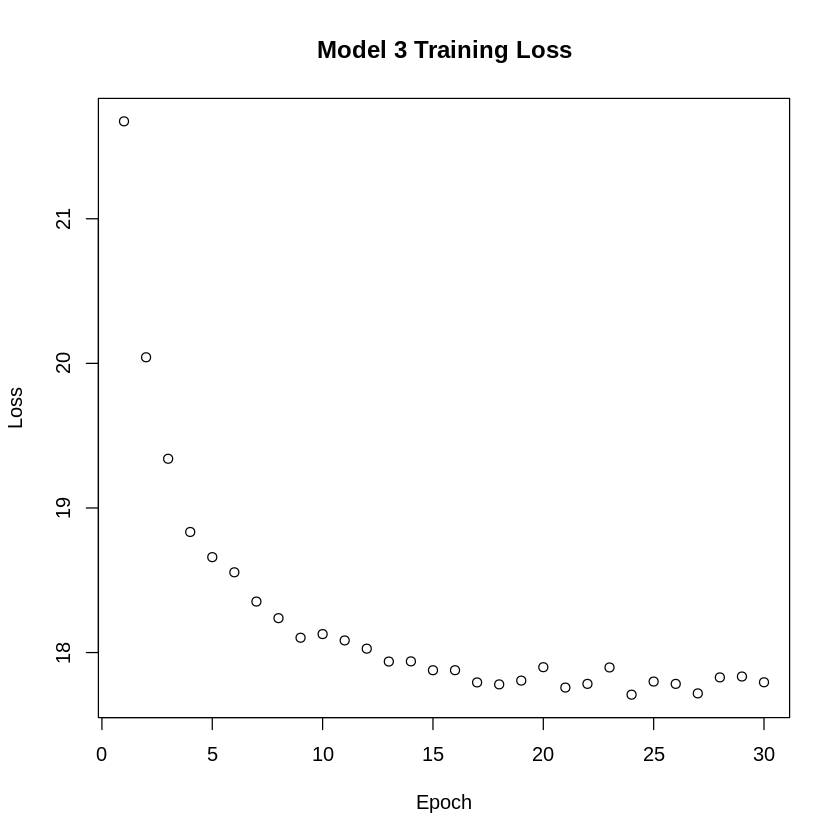

In [27]:
history_1pl <- train_model(vae_1pl, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

plot(history_1pl,
     main = 'Model 3 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')

In [28]:
# Get parameter estimates for Model 3
item_param_estimates_1pl <- get_item_parameter_estimates(decoder_1pl, model_type = 1)
diff_est_1pl <- item_param_estimates_1pl[[1]]

In [29]:
# No discrimination parameters in this model
test_theta_est_1pl <- get_ability_parameter_estimates(encoder_1pl, data_test)[[1]]
all_theta_est_1pl <- get_ability_parameter_estimates(encoder_1pl, data)[[1]]

In [30]:
# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true)
diff_true <- as.matrix(diff_true)
theta_true<- as.matrix(theta_true)

In [31]:
# Examine Model 1 estimates
par(pty="s")
matplot(t(disc_true), t(disc_est_ind), pch = '*',
xlim = c(0.05, 2), ylim = c(0.05, 2),
main = 'Model 1 Discrimination Parameters',
sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

ERROR: ignored

In [32]:
par(pty="s")
plot(diff_true, diff_est_ind, pch = '*',
xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
main = 'Model 1 Difficulty Parameters',
sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

ERROR: ignored

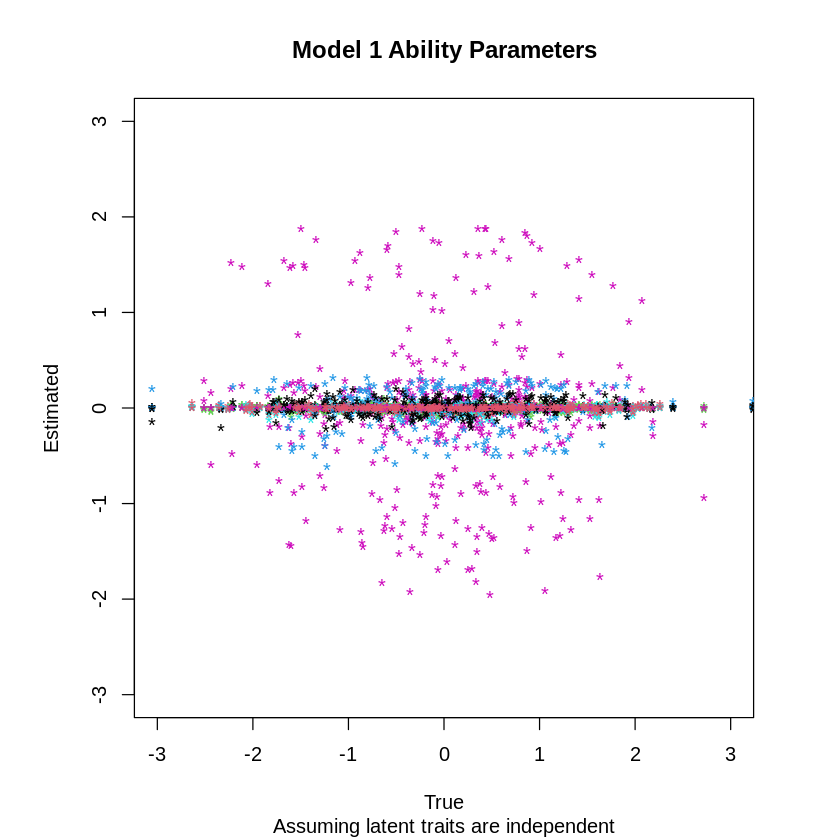

In [34]:
par(pty="s")
matplot(theta_true[3200:3400,], all_theta_est_ind[3200:3400,], pch = '*',
xlim = c(-3,3), ylim = c(-3,3),
main = 'Model 1 Ability Parameters',
sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

In [35]:
# Examine Model 2 estimates
par(pty="s")
matplot(t(disc_true), t(disc_est_cor), pch = '*',
xlim = c(0.05, 2), ylim = c(0.05, 2),
main = 'Model 2 Discrimination Parameters',
sub = 'Assuming known correlation between latent traits',
xlab = 'True', ylab = 'Estimated')

ERROR: ignored

In [36]:
par(pty="s")
plot(diff_true, diff_est_cor, pch = '*',
xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
main = 'Model 2 Difficulty Parameters',
sub = 'Assuming known correlation between latent traits',
xlab = 'True', ylab = 'Estimated')

ERROR: ignored

In [37]:
par(pty="s")
matplot(theta_true[4200:4400,], all_theta_est_cor[4200:4400,], pch = '*',
xlim = c(-3,3), ylim = c(-3,3),
main = 'Model 2 Ability Parameters',
sub = 'Assuming known correlation between latent traits',
xlab = 'True', ylab = 'Estimated')

ERROR: ignored

In [40]:
# Examine Model 3 estimates
theta_summed <- rowSums(theta_true[2200:2400,]) par(pty="s")
plot(diff_true, diff_est_1pl, pch = '*',
xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
main = 'Model 3 Difficulty Parameters',
sub = 'Assuming single latent trait and 1-PL model',
xlab = 'True', ylab = 'Estimated')

ERROR: ignored

In [43]:
par(pty="s")
plot(theta_summed, all_theta_est_1pl[3200:3400,1], pch = '*',
xlim = c(-3,3), ylim = c(-3,3),
main = 'Model 3 Ability Parameters',
sub = 'Assuming single latent trait and 1-PL model',
xlab = 'True', ylab = 'Estimated')

ERROR: ignored